# Time Series

Zhentao Shi

<!-- code is tested on SCRP -->

In [3]:
library(magrittr)
library(dplyr)
library(zoo)
library(rvest)
library(Quandl)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: xts


################################### WARNING ###################################
# We noticed you have dplyr installed. The dplyr lag() function breaks how    #
# base R's lag() function is supposed to work, which breaks lag(my_xts).      #
#                                                                             #
# Calls to lag(my_xts) that you enter or source() into this session won't     #
# work correctly.                                                             #
#                                                                             #
# All package code is unaffected because it is protected by the R namespace   #
# mechanism. 

## Time Series

- Macroeconomics
  - 国家统计局 [National Bureau of Statistics](https://data.stats.gov.cn/easyquery.htm?cn=B01)
  - Federal Reserve [FRED database](https://research.stlouisfed.org/econ/mccracken/fred-databases/)
- Financial
  - [Yahoo Finance](https://finance.yahoo.com/)

## China's GDP Growth Rate

* [From World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?locations=CN)


## Finance Data


* [Yahoo Finance](https://finance.yahoo.com/)

* Tick `AAPL` for *Apple Inc.* 
  * Package `quantmod`

[1] "AAPL"

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2023-03-03    148.04    151.11   147.33     151.03    70668500        151.03
2023-03-06    153.79    156.30   153.46     153.83    87558000        153.83
2023-03-07    153.70    154.03   151.13     151.60    56182000        151.60
2023-03-08    152.81    153.47   151.83     152.87    47204800        152.87
2023-03-09    153.56    154.54   150.23     150.59    53833600        150.59
2023-03-10    150.21    150.94   147.61     148.50    68524400        148.50

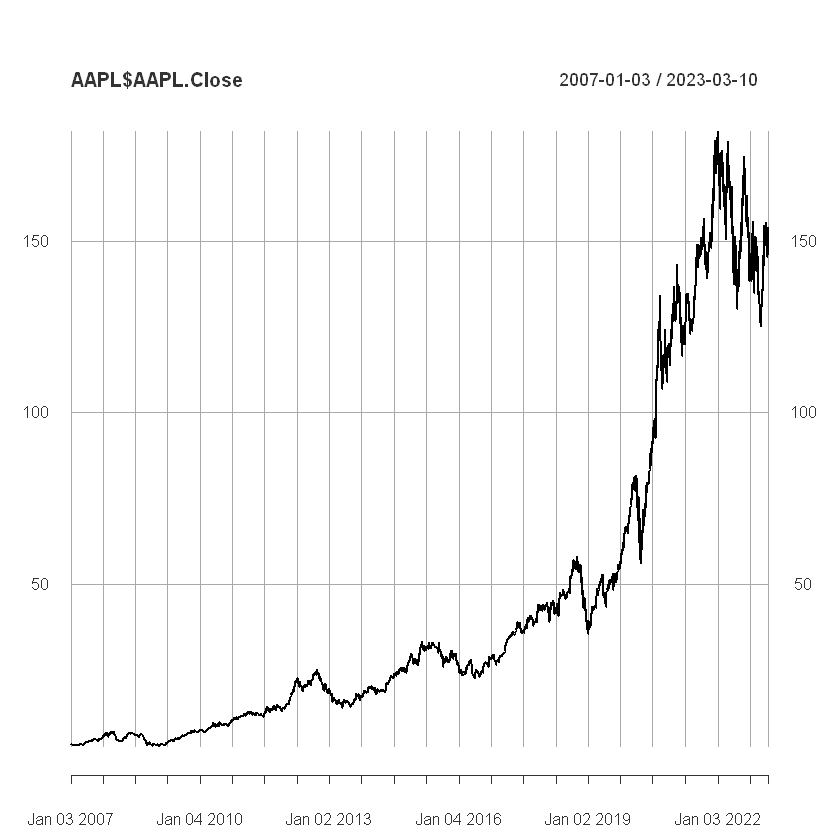

In [6]:
quantmod::getSymbols("AAPL", src = "yahoo")
tail(AAPL)
plot(AAPL$AAPL.Close)

### Shanghai Composite Index

Warning message:
"000001.SS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


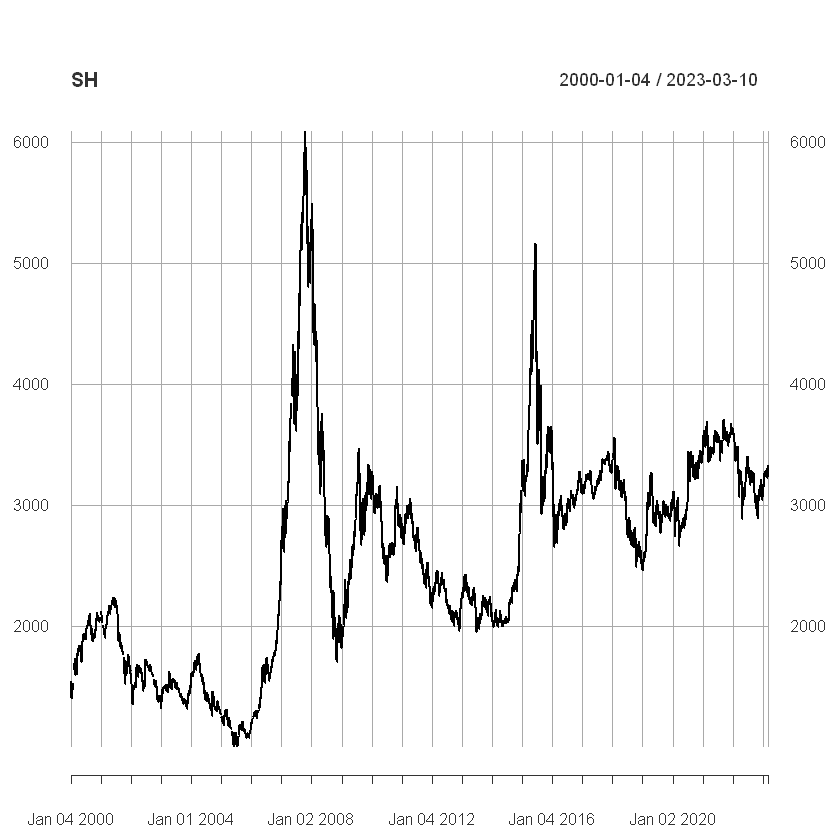

In [7]:
tick = "000001.SS" # need to find the tick 
SH <- quantmod::getSymbols(tick, auto.assign = FALSE, 
         from = "2000-01-01")[, paste0(tick,".Close")]

plot(SH)

### 000001.SS Return

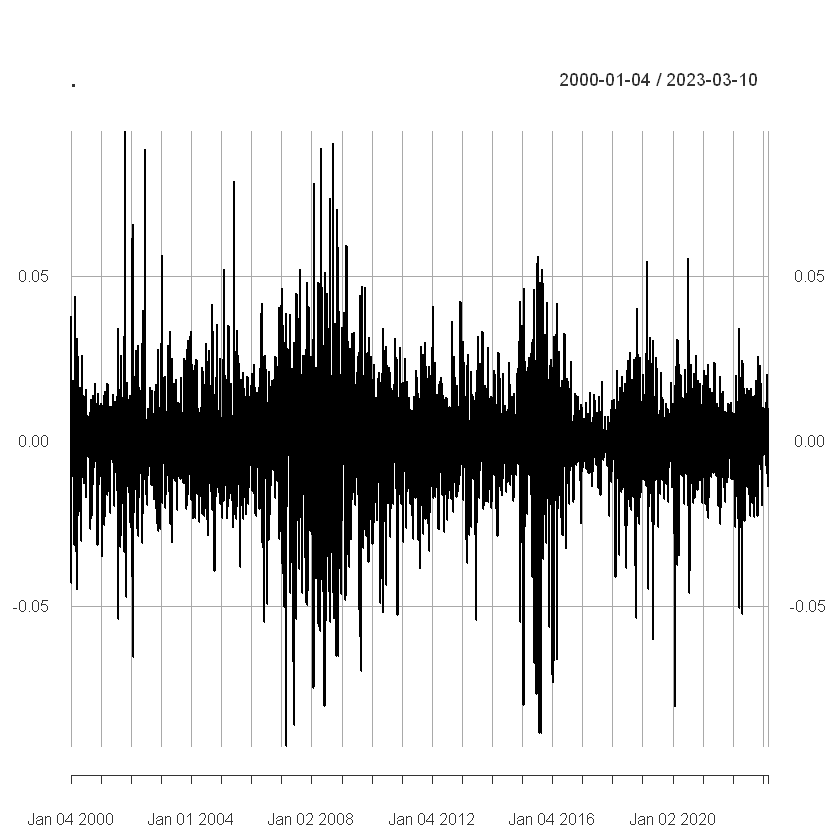

In [8]:
diff(log(SH)) %>% plot

### Bitcoin

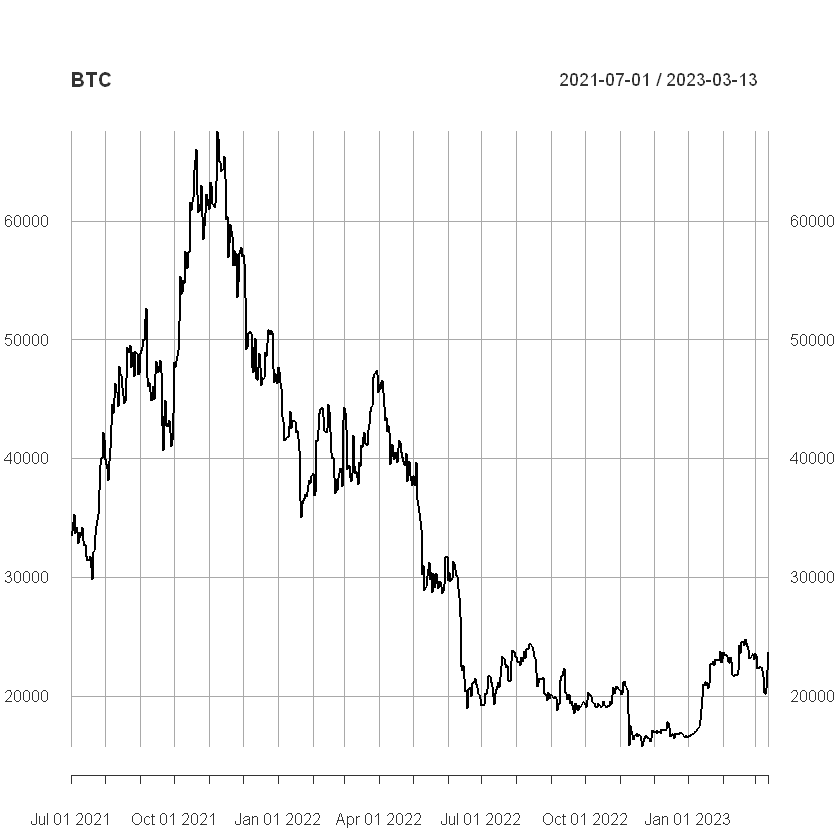

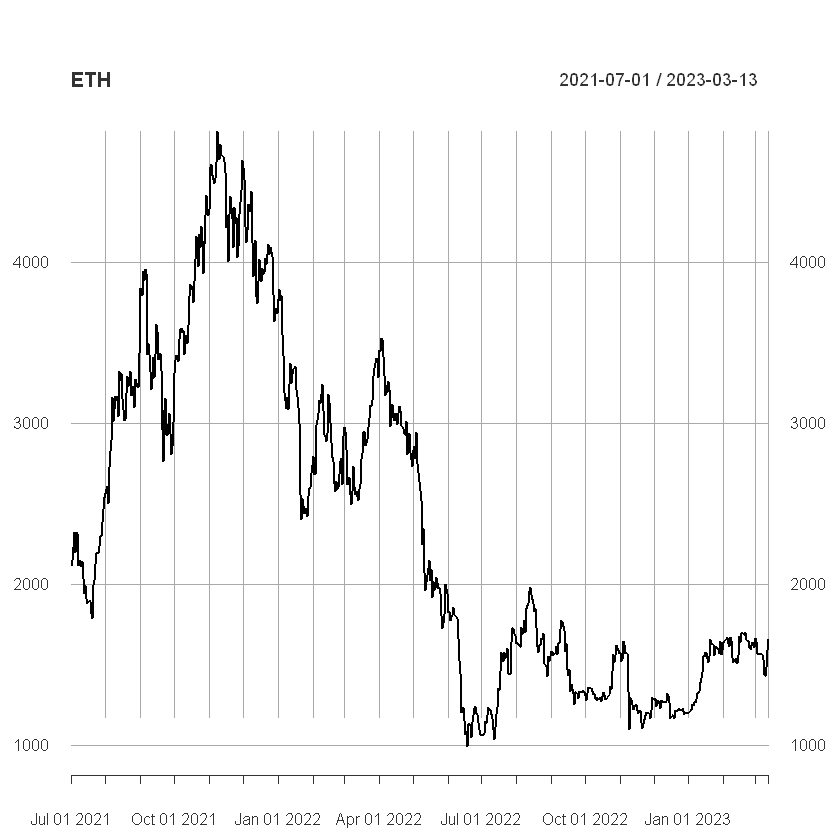

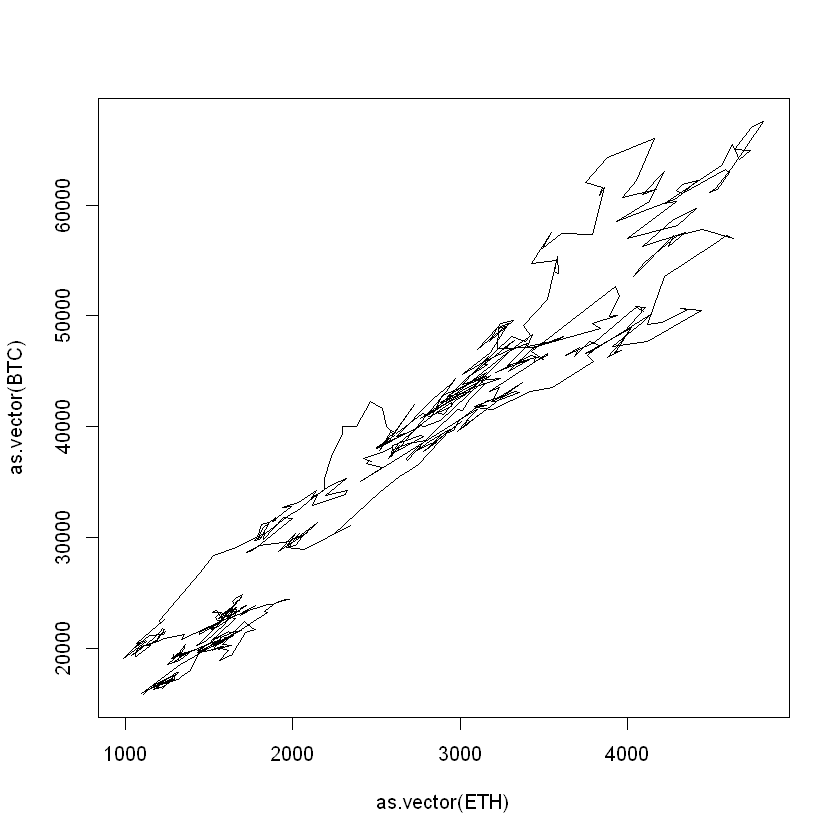

In [9]:
BTC <- quantmod::getSymbols("BTC-USD",auto.assign = FALSE, from = "2021-07-01")[,4]
plot(BTC)

ETH <- quantmod::getSymbols("ETH-USD",auto.assign = FALSE, from = "2021-07-01")[,4]
plot(ETH)

plot( x = as.vector(ETH), y = as.vector(BTC), type = "l")